<a href="https://colab.research.google.com/github/Antonio-Villarreal/Deep-Learning-For-Dummies/blob/main/VGG16_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [45]:
import tensorflow as tf

import keras
import keras.utils
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import keras.utils as image
import keras.utils as image
from keras.utils import to_categorical
from keras.callbacks import History
from tensorflow.keras.callbacks import History

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# VGG-16 Architecture (Scratch)

## Model 1

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Input layer
input_layer = Input(shape=(32, 32, 3))

# Block 1
x = Conv2D(64, (32, 32), activation='relu', padding='same', name='block1_conv1')(input_layer)
x = Conv2D(64, (32, 32), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

# Flatten
x = Flatten(name='flatten')(x)

# Fully connected layers
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)

# Add a final output layer with softmax activation
output_layer = Dense(10, activation='softmax', name='predictions')(x)

In [ ]:
model = Model(input_layer, output_layer)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        196672    
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        4194368   
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history1 = model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

In [ ]:
print("Final validation accuracy: ", history1.history['val_accuracy'][-1])
print("Final validation loss: ", history1.history['val_loss'][-1])
print("Final training accuracy: ", history1.history['accuracy'][-1])
print("Final training loss: ", history1.history['loss'][-1])

# VGG-16 Architecture (Imported)

## Model 2

In [43]:
from keras.applications.vgg16 import VGG16

In [44]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [46]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [47]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [48]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [49]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [50]:
# Create base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

In [51]:
# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

In [52]:
# Add new layers
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

In [53]:
# Create new model
model2 = Model(inputs=base_model.input, outputs=predictions)

In [54]:
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [55]:
# Compile and train the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
# model2.fit(x_train, y_train, epochs=1, callbacks=[tensorboard])
history2 = model2.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 702s 449ms/step - loss: 1.3177 - accuracy: 0.5363 - val_loss: 1.2789 - val_accuracy: 0.5554
Epoch 2/5
1563/1563 [==============================] - 690s 442ms/step - loss: 1.1444 - accuracy: 0.5963 - val_loss: 1.1756 - val_accuracy: 0.5815
Epoch 3/5
1563/1563 [==============================] - 677s 433ms/step - loss: 1.0591 - accuracy: 0.6261 - val_loss: 1.1424 - val_accuracy: 0.6029
Epoch 4/5
1563/1563 [==============================] - 675s 432ms/step - loss: 0.9899 - accuracy: 0.6482 - val_loss: 1.1215 - val_accuracy: 0.6099
Epoch 5/5
1563/1563 [==============================] - 673s 431ms/step - loss: 0.9305 - accuracy: 0.6702 - val_loss: 1.1008 - val_accuracy: 0.6219


In [57]:
print("Final validation accuracy: ", history2.history['val_accuracy'][-1])
print("Final validation loss: ", history2.history['val_loss'][-1])
print("Final training accuracy: ", history2.history['accuracy'][-1])
print("Final training loss: ", history2.history['loss'][-1])

Final validation accuracy:  0.6219000220298767
Final validation loss:  1.1007505655288696
Final training accuracy:  0.6701599955558777
Final training loss:  0.9304876327514648


## Model 3

In [58]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [59]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [60]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [61]:
# Create base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

In [62]:
# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

In [63]:
# Add new layers
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

In [64]:
model3 = Model(inputs=base_model.input, outputs=predictions)

In [65]:
model3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [66]:
# Compile and train the model
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [67]:
history3 = model3.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 679s 434ms/step - loss: 1.3226 - accuracy: 0.5368 - val_loss: 1.2484 - val_accuracy: 0.5651
Epoch 2/5
1563/1563 [==============================] - 676s 432ms/step - loss: 1.1425 - accuracy: 0.5980 - val_loss: 1.1800 - val_accuracy: 0.5824
Epoch 3/5
1563/1563 [==============================] - 696s 445ms/step - loss: 1.0573 - accuracy: 0.6261 - val_loss: 1.1439 - val_accuracy: 0.5957
Epoch 4/5
1563/1563 [==============================] - 689s 441ms/step - loss: 0.9910 - accuracy: 0.6479 - val_loss: 1.1071 - val_accuracy: 0.6084
Epoch 5/5
1563/1563 [==============================] - 691s 442ms/step - loss: 0.9276 - accuracy: 0.6706 - val_loss: 1.0903 - val_accuracy: 0.6234


# Results

## Model 1

## Model 2

In [68]:
print("Final validation accuracy: ", history2.history['val_accuracy'][-1])
print("Final validation loss: ", history2.history['val_loss'][-1])
print("Final training accuracy: ", history2.history['accuracy'][-1])
print("Final training loss: ", history2.history['loss'][-1])

Final validation accuracy:  0.6219000220298767
Final validation loss:  1.1007505655288696
Final training accuracy:  0.6701599955558777
Final training loss:  0.9304876327514648


## Model 3

In [69]:
print("Final validation accuracy: ", history3.history['val_accuracy'][-1])
print("Final validation loss: ", history3.history['val_loss'][-1])
print("Final training accuracy: ", history3.history['accuracy'][-1])
print("Final training loss: ", history3.history['loss'][-1])

Final validation accuracy:  0.6233999729156494
Final validation loss:  1.0903443098068237
Final training accuracy:  0.6705600023269653
Final training loss:  0.9275918006896973


Comparison

In [71]:
# acc1 = history1.history['val_accuracy']
acc2 = history2.history['val_accuracy']
acc3 = history3.history['val_accuracy']

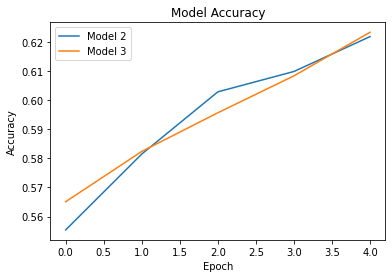

In [72]:
# plt.plot(acc1, label='Model 1')
plt.plot(acc2, label='Model 2')
plt.plot(acc3, label='Model 3')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()